In [36]:
import pandas as pd
import numpy as np
import json
import os
import random
import string
import re
import matplotlib.pyplot as plt
import pickle

from pathlib import Path
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from catboost import CatBoostRegressor
from catboost import Pool
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,mean_squared_log_error

import umap
pd.set_option('display.max_columns', 2000)

SEED = 777



In [2]:
df_train = pd.read_pickle('../data/train/full_comp.pickle')
df_train.shape


(851524, 619)

In [3]:
pd.read_pickle('../data/train/08_diff_feature.pickle')

,id,diff_doi_cites_doi_cites_mean_submitter_label,diff_rate_doi_cites_doi_cites_mean_submitter_label,diff_doi_cites_doi_cites_mean_doi_id_label,diff_rate_doi_cites_doi_cites_mean_doi_id_label,diff_doi_cites_doi_cites_mean_author_first_label,diff_rate_doi_cites_doi_cites_mean_author_first_label,diff_doi_cites_doi_cites_mean_pub_publisher_label,diff_rate_doi_cites_doi_cites_mean_pub_publisher_label,diff_doi_cites_doi_cites_mean_update_ym,diff_rate_doi_cites_doi_cites_mean_update_ym,diff_doi_cites_doi_cites_mean_first_created_ym,diff_rate_doi_cites_doi_cites_mean_first_created_ym,diff_doi_cites_doi_cites_mean_license_label,diff_rate_doi_cites_doi_cites_mean_license_label,diff_doi_cites_doi_cites_mean_category_main_label,diff_rate_doi_cites_doi_cites_mean_category_main_label,diff_doi_cites_doi_cites_mean_category_main_detail_label,diff_rate_doi_cites_doi_cites_mean_category_main_detail_label,diff_doi_cites_doi_cites_mean_category_name_parent_label,diff_rate_doi_cites_doi_cites_mean_category_name_parent_label,diff_doi_cites_doi_cites_mean_category_name_parent_main_label,diff_rate_doi_cites_doi_cites_mean_category_name_parent_main_label,diff_doi_cites_doi_cites_mean_category_name_label,diff_rate_doi_cites_doi_cites_mean_category_name_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_doi_id_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_doi_id_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_author_first_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_author_first_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_pub_publisher_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_pub_publisher_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_update_ym,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_update_ym,diff_doi_cites_mean_submitter_label_doi_cites_mean_first_created_ym,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_first_created_ym,diff_doi_cites_mean_submitter_label_doi_cites_mean_license_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_license_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_category_main_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_category_main_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_category_main_detail_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_category_main_detail_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_category_name_parent_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_category_name_parent_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_category_name_parent_main_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_category_name_parent_main_label,diff_doi_cites_mean_submitter_label_doi_cites_mean_category_name_label,diff_rate_doi_cites_mean_submitter_label_doi_cites_mean_category_name_label,diff_doi_cites_mean_doi_id_label_doi_cites_mean_author_first_label,diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_author_first_label,diff_doi_cites_mean_doi_id_label_doi_cites_mean_pub_publisher_label,diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_pub_publisher_label,diff_doi_cites_mean_doi_id_label_doi_cites_mean_update_ym,diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_update_ym,diff_doi_cites_mean_doi_id_label_doi_cites_mean_first_created_ym,diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_first_created_ym,diff_doi_cites_mean_doi_id_label_doi_cites_mean_license_label,diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_license_label,diff_doi_cites_mean_doi_id_label_doi_cites_mean_category_main_label,diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_category_main_label,diff_doi_cites_mean_doi_id_label_doi_cites_mean_category_main_detail_label,diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_category_main_detail_label,diff_doi_cites_mean_doi_id_label_doi_cites_mean_category_name_parent_label,diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_category_name_parent_label,diff_doi_cites_

In [4]:
df_train.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date_x,authors_parsed,doi_cites,cites,doi_id,pub_publisher,pub_journals,pub_dois,update_date_y,first_created_date,last_created_date,update_year,first_created_year,last_created_year,update_month,first_created_month,last_created_month,update_ym,first_created_ym,last_created_ym,update_day,first_created_day,last_created_day,update_date_unixtime,first_created_unixtime,last_created_unixtime,diff_update_date_unixtime,diff_created_unixtime,num_created,update_date_days,first_created_days,last_created_days,diff_created_days,rate_created_days,author_first,author_num,category_main_detail,category_main,acc-phys_x,adap-org_x,alg-geom_x,ao-sci_x,astro-ph_x,atom-ph_x,bayes-an_x,chao-dyn_x,chem-ph_x,cmp-lg_x,comp-gas_x,cond-mat_x,cs_x,dg-ga_x,econ_x,eess_x,funct-an_x,gr-qc_x,hep-ex_x,hep-lat_x,hep-ph_x,hep-th_x,math_x,math-ph_x,mtrl-th_x,nlin_x,nucl-ex_x,nucl-th_x,patt-sol_x,physics_x,plasm-ph_x,q-alg_x,q-bio_x,q-fin_x,quant-ph_x,solv-int_x,stat_x,supr-con_x,acc_x,adap_x,alg_x,ao_x,astro_x,atom_x,bayes_x,chao_x,chem_x,cmp_x,comp_x,cond_x,cs_y,dg_x,econ_y,eess_y,funct_x,gr_x,hep_x,math_y,mtrl_x,nlin_y,nucl_x,patt_x,physics_y,plasm_x,q_x,quant_x,solv_x,stat_y,supr_x,category_name_parent_main_unique,category_name_parent_unique,category_name_unique,acc-phys_y,adap-org_y,alg-geom_y,ao-sci_y,astro-ph_y,atom-ph_y,bayes-an_y,chao-dyn_y,chem-ph_y,cmp-lg_y,comp-gas_y,cond-mat_y,dg-ga_y,funct-an_y,gr-qc_y,hep-ex_y,hep-lat_y,hep-ph_y,hep-th_y,math-ph_y,mtrl-th_y,nucl-ex_y,nucl-th_y,patt-sol_y,plasm-ph_y,q-alg_y,q-bio_y,q-fin_y,quant-ph_y,solv-int_y,supr-con_y,acc_y,adap_y,alg_y,ao_y,astro_y,atom_y,bayes_y,chao_y,chem_y,cmp_y,comp_y,cond_y,cs,dg_y,econ,eess,funct_y,gr_y,hep_y,math,mtrl_y,nlin,nucl_y,patt_y,physics,plasm_y,q_y,quant_y,solv_y,stat,supr_y,astro-ph.co,astro-ph.ep,astro-ph.ga,astro-ph.he,astro-ph.im,astro-ph.sr,cond-mat.dis-nn,cond-mat.mes-hall,cond-mat.mtrl-sci,cond-mat.other,cond-mat.quant-gas,cond-mat.soft,cond-mat.stat-mech,cond-mat.str-el,cond-mat.supr-con,cs.ai,cs.ar,cs.cc,cs.ce,cs.cg,cs.cl,cs.cr,cs.cv,cs.cy,cs.db,cs.dc,cs.dl,cs.dm,cs.ds,cs.et,cs.fl,cs.gl,cs.gr,cs.gt,cs.hc,cs.ir,cs.it,cs.lg,cs.lo,cs.ma,cs.mm,cs.ms,cs.na,cs.ne,cs.ni,cs.oh,cs.os,cs.pf,cs.pl,cs.ro,cs.sc,cs.sd,cs.se,cs.si,cs.sy,econ.em,econ.gn,econ.th,eess.as,eess.iv,eess.sp,eess.sy,math.ac,math.ag,math.ap,math.at,math.ca,math.co,math.ct,math.cv,math.dg,math.ds,math.fa,math.gm,math.gn,math.gr,math.gt,math.ho,math.it,math.kt,math.lo,math.mg,math.mp,math.na,math.nt,math.oa,math.oc,math.pr,math.qa,math.ra,math.rt,math.sg,math.sp,math.st,nlin.ao,nlin.cd,nlin.cg,nlin.ps,nlin.si,physics.acc-ph,physics.ao-ph,physics.app-ph,physics.atm-clus,physics.atom-ph,physics.bio-ph,physics.chem-ph,physics.class-ph,physics.comp-ph,physics.data-an,physics.ed-ph,physics.flu-dyn,physics.gen-ph,physics.geo-ph,physics.hist-ph,physics.ins-det,physics.med-ph,physics.optics,physics.plasm-ph,physics.pop-ph,physics.soc-ph,physics.space-ph,q-bio.bm,q-bio.cb,q-bio.gn,q-bio.mn,q-bio.nc,q-bio.ot,q-bio.pe,q-bio.qm,q-bio.sc,q-bio.to,q-fin.cp,q-fin.ec,q-fin.gn,q-fin.mf,q-fin.pm,q-fin.pr,q-fin.rm,q-fin.st,q-fin.tr,stat.ap,stat.co,stat.me,stat.ml,stat.ot,stat.th,submitter_label,doi_id_label,author_first_label,pub_publisher_label,license_label,category_main_label,category_main_detail_label,category_name_parent_label,category_name_parent_main_label,category_name_label,doi_cites_mean_author_first_label,doi_cites_count_author_first_label,doi_cites_sum_author_first_label,doi_cites_min_author_first_label,doi_cites_max_author_first_label,doi_cites_median_author_first_label,doi_cites_std_author_first_label,doi_cites_q10_author_first_label,doi_cites_q25_author_first_label,doi_cites_q75_author_first_label,doi_cites_mean_doi_id_label,doi_cites_count_doi_id_label,doi_cites_sum_doi_id_label,doi_cites_min_doi_id_label,doi_cites_max_doi_id_label,doi_cites_median_doi_id_label,doi_cites_std_doi_id_label,doi_cites_q10_doi_id_l

In [5]:
df_bert = pd.read_pickle('../data/train/10_roberta_raw.pickle')
df_bert.shape


(851524, 769)

In [8]:
df_bert[df_bert['roberta_vec_0'].isnull()].head()

,id,roberta_vec_0,roberta_vec_1,roberta_vec_2,roberta_vec_3,roberta_vec_4,roberta_vec_5,roberta_vec_6,roberta_vec_7,roberta_vec_8,roberta_vec_9,roberta_vec_10,roberta_vec_11,roberta_vec_12,roberta_vec_13,roberta_vec_14,roberta_vec_15,roberta_vec_16,roberta_vec_17,roberta_vec_18,roberta_vec_19,roberta_vec_20,roberta_vec_21,roberta_vec_22,roberta_vec_23,roberta_vec_24,roberta_vec_25,roberta_vec_26,roberta_vec_27,roberta_vec_28,roberta_vec_29,roberta_vec_30,roberta_vec_31,roberta_vec_32,roberta_vec_33,roberta_vec_34,roberta_vec_35,roberta_vec_36,roberta_vec_37,roberta_vec_38,roberta_vec_39,roberta_vec_40,roberta_vec_41,roberta_vec_42,roberta_vec_43,roberta_vec_44,roberta_vec_45,roberta_vec_46,roberta_vec_47,roberta_vec_48,roberta_vec_49,roberta_vec_50,roberta_vec_51,roberta_vec_52,roberta_vec_53,roberta_vec_54,roberta_vec_55,roberta_vec_56,roberta_vec_57,roberta_vec_58,roberta_vec_59,roberta_vec_60,roberta_vec_61,roberta_vec_62,roberta_vec_63,roberta_vec_64,roberta_vec_65,roberta_vec_66,roberta_vec_67,roberta_vec_68,roberta_vec_69,roberta_vec_70,roberta_vec_71,roberta_vec_72,roberta_vec_73,roberta_vec_74,roberta_vec_75,roberta_vec_76,roberta_vec_77,roberta_vec_78,roberta_vec_79,roberta_vec_80,roberta_vec_81,roberta_vec_82,roberta_vec_83,roberta_vec_84,roberta_vec_85,roberta_vec_86,roberta_vec_87,roberta_vec_88,roberta_vec_89,roberta_vec_90,roberta_vec_91,roberta_vec_92,roberta_vec_93,roberta_vec_94,roberta_vec_95,roberta_vec_96,roberta_vec_97,roberta_vec_98,roberta_vec_99,roberta_vec_100,roberta_vec_101,roberta_vec_102,roberta_vec_103,roberta_vec_104,roberta_vec_105,roberta_vec_106,roberta_vec_107,roberta_vec_108,roberta_vec_109,roberta_vec_110,roberta_vec_111,roberta_vec_112,roberta_vec_113,roberta_vec_114,roberta_vec_115,roberta_vec_116,roberta_vec_117,roberta_vec_118,roberta_vec_119,roberta_vec_120,roberta_vec_121,roberta_vec_122,roberta_vec_123,roberta_vec_124,roberta_vec_125,roberta_vec_126,roberta_vec_127,roberta_vec_128,roberta_vec_129,roberta_vec_130,roberta_vec_131,roberta_vec_132,roberta_vec_133,roberta_vec_134,roberta_vec_135,roberta_vec_136,roberta_vec_137,roberta_vec_138,roberta_vec_139,roberta_vec_140,roberta_vec_141,roberta_vec_142,roberta_vec_143,roberta_vec_144,roberta_vec_145,roberta_vec_146,roberta_vec_147,roberta_vec_148,roberta_vec_149,roberta_vec_150,roberta_vec_151,roberta_vec_152,roberta_vec_153,roberta_vec_154,roberta_vec_155,roberta_vec_156,roberta_vec_157,roberta_vec_158,roberta_vec_159,roberta_vec_160,roberta_vec_161,roberta_vec_162,roberta_vec_163,roberta_vec_164,roberta_vec_165,roberta_vec_166,roberta_vec_167,roberta_vec_168,roberta_vec_169,roberta_vec_170,roberta_vec_171,roberta_vec_172,roberta_vec_173,roberta_vec_174,roberta_vec_175,roberta_vec_176,roberta_vec_177,roberta_vec_178,roberta_vec_179,roberta_vec_180,roberta_vec_181,roberta_vec_182,roberta_vec_183,roberta_vec_184,roberta_vec_185,roberta_vec_186,roberta_vec_187,roberta_vec_188,roberta_vec_189,roberta_vec_190,roberta_vec_191,roberta_vec_192,roberta_vec_193,roberta_vec_194,roberta_vec_195,roberta_vec_196,roberta_vec_197,roberta_vec_198,roberta_vec_199,roberta_vec_200,roberta_vec_201,roberta_vec_202,roberta_vec_203,roberta_vec_204,roberta_vec_205,roberta_vec_206,roberta_vec_207,roberta_vec_208,roberta_vec_209,roberta_vec_210,roberta_vec_211,roberta_vec_212,roberta_vec_213,roberta_vec_214,roberta_vec_215,roberta_vec_216,roberta_vec_217,roberta_vec_218,roberta_vec_219,roberta_vec_220,roberta_vec_221,roberta_vec_222,roberta_vec_223,roberta_vec_224,roberta_vec_225,roberta_vec_226,roberta_vec_227,roberta_vec_228,roberta_vec_229,roberta_vec_230,roberta_vec_231,roberta_vec_232,roberta_vec_233,roberta_vec_234,roberta_vec_235,roberta_vec_236,roberta_vec_237,roberta_vec_238,roberta_vec_239,roberta_vec_240,roberta_vec_241,roberta_vec_242,roberta_vec_243,roberta_vec_244,roberta_vec_245,roberta_vec_246,roberta_vec_247,roberta_vec_248,roberta_vec_249,roberta_vec_250,roberta_vec_251,roberta_vec_252,roberta_vec_253,roberta_vec_254,roberta_vec_255,roberta_ve

In [9]:
df_bert.id.nunique()

851524

In [19]:
umap_bert_dim = 10
reducer = umap.UMAP(random_state=SEED, n_components=umap_bert_dim)
reducer.fit(df_bert.drop(['id'], axis=1).sample(frac=0.4, random_state=SEED))

UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=10, random_state=777)

In [22]:
pickle.dump(reducer, open('umap.pkl', 'wb'))


In [24]:
embedding = reducer.transform(df_bert.drop(['id'], axis=1))
embedding[:10]

array([[-0.5531166 ,  9.325663  ,  9.855214  ,  3.9842236 ,  6.93515   ,
         3.823505  ,  8.802672  ,  4.445727  ,  6.954917  ,  4.524702  ],
       [11.578872  , 10.407026  , 10.05347   ,  1.2780082 ,  7.7814116 ,
         2.1106248 , 10.261924  ,  4.25004   ,  6.911111  ,  2.8980074 ],
       [ 4.056109  ,  3.566019  ,  3.433505  ,  0.8811371 ,  2.6521044 ,
         0.6936703 ,  3.2338803 ,  1.3188471 ,  2.3757904 ,  1.2369454 ],
       [-0.92472696,  9.339301  ,  9.792504  ,  3.843477  ,  6.776888  ,
         1.8955876 ,  8.766671  ,  5.0651407 ,  6.4661527 ,  3.182744  ],
       [-0.24996659,  3.3217907 ,  3.6257093 ,  1.545837  ,  2.900322  ,
         0.5355104 ,  3.1986465 ,  1.5645032 ,  2.5646162 ,  1.7548779 ],
       [ 3.9774735 ,  3.5887723 ,  3.4708638 ,  0.47384048,  2.6730103 ,
         0.7051171 ,  3.133211  ,  1.1361978 ,  2.4011195 ,  1.2460158 ],
       [-0.07223986,  9.974056  , 10.038806  ,  4.0227976 ,  7.452734  ,
         2.7896907 ,  9.498881  ,  3.8894477 

In [25]:
col_dict = {}
for i in range(umap_bert_dim):
    col_dict[i] = f'umap_bert_{i}'

df_umap = pd.concat([df_bert[['id']], pd.DataFrame(embedding).rename(columns=col_dict)], axis=1)
df_umap.shape

(851524, 11)

In [26]:
df_umap.head()

,id,umap_bert_0,umap_bert_1,umap_bert_2,umap_bert_3,umap_bert_4,umap_bert_5,umap_bert_6,umap_bert_7,umap_bert_8,umap_bert_9
0,hep-ph/9902295,-0.553117,9.325663,9.855214,3.984224,6.935150,3.823505,8.802672,4.445727,6.954917,4.524702
1,1403.7138,11.578872,10.407026,10.053470,1.278008,7.781412,2.110625,10.261924,4.250040,6.911111,2.898007
2,1405.5857,4.056109,3.566019,3.433505,0.881137,2.652104,0.693670,3.233880,1.318847,2.375790,1.236945
3,1807.01034,-0.924727,9.339301,9.792504,3.843477,6.776888,1.895588,8.766671,5.065141,6.466153,3.182744
4,1905.05921,-0.249967,3.321791,3.625709,1.545837,2.900322,0.535510,3.198647,1.564503,2.564616,1.754878


In [27]:
df_umap.to_pickle('../data/train/11_bert_umap_feature.pickle')

In [29]:
df_umap.head()

,id,umap_bert_0,umap_bert_1,umap_bert_2,umap_bert_3,umap_bert_4,umap_bert_5,umap_bert_6,umap_bert_7,umap_bert_8,umap_bert_9
0,hep-ph/9902295,-0.553117,9.325663,9.855214,3.984224,6.935150,3.823505,8.802672,4.445727,6.954917,4.524702
1,1403.7138,11.578872,10.407026,10.053470,1.278008,7.781412,2.110625,10.261924,4.250040,6.911111,2.898007
2,1405.5857,4.056109,3.566019,3.433505,0.881137,2.652104,0.693670,3.233880,1.318847,2.375790,1.236945
3,1807.01034,-0.924727,9.339301,9.792504,3.843477,6.776888,1.895588,8.766671,5.065141,6.466153,3.182744
4,1905.05921,-0.249967,3.321791,3.625709,1.545837,2.900322,0.535510,3.198647,1.564503,2.564616,1.754878


In [6]:
df_train = pd.merge(df_train, df_bert, on='id', how='left')
df_train = pd.merge(df_train, pd.read_pickle('../data/train/11_bert_umap_feature.pickle'), on='id', how='left')
df_train.shape

(851524, 1397)

In [7]:
df_train[df_train['umap_bert_0'].isnull()]

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date_x,authors_parsed,doi_cites,cites,doi_id,pub_publisher,pub_journals,pub_dois,update_date_y,first_created_date,last_created_date,update_year,first_created_year,last_created_year,update_month,first_created_month,last_created_month,update_ym,first_created_ym,last_created_ym,update_day,first_created_day,last_created_day,update_date_unixtime,first_created_unixtime,last_created_unixtime,diff_update_date_unixtime,diff_created_unixtime,num_created,update_date_days,first_created_days,last_created_days,diff_created_days,rate_created_days,author_first,author_num,category_main_detail,category_main,acc-phys_x,adap-org_x,alg-geom_x,ao-sci_x,astro-ph_x,atom-ph_x,bayes-an_x,chao-dyn_x,chem-ph_x,cmp-lg_x,comp-gas_x,cond-mat_x,cs_x,dg-ga_x,econ_x,eess_x,funct-an_x,gr-qc_x,hep-ex_x,hep-lat_x,hep-ph_x,hep-th_x,math_x,math-ph_x,mtrl-th_x,nlin_x,nucl-ex_x,nucl-th_x,patt-sol_x,physics_x,plasm-ph_x,q-alg_x,q-bio_x,q-fin_x,quant-ph_x,solv-int_x,stat_x,supr-con_x,acc_x,adap_x,alg_x,ao_x,astro_x,atom_x,bayes_x,chao_x,chem_x,cmp_x,comp_x,cond_x,cs_y,dg_x,econ_y,eess_y,funct_x,gr_x,hep_x,math_y,mtrl_x,nlin_y,nucl_x,patt_x,physics_y,plasm_x,q_x,quant_x,solv_x,stat_y,supr_x,category_name_parent_main_unique,category_name_parent_unique,category_name_unique,acc-phys_y,adap-org_y,alg-geom_y,ao-sci_y,astro-ph_y,atom-ph_y,bayes-an_y,chao-dyn_y,chem-ph_y,cmp-lg_y,comp-gas_y,cond-mat_y,dg-ga_y,funct-an_y,gr-qc_y,hep-ex_y,hep-lat_y,hep-ph_y,hep-th_y,math-ph_y,mtrl-th_y,nucl-ex_y,nucl-th_y,patt-sol_y,plasm-ph_y,q-alg_y,q-bio_y,q-fin_y,quant-ph_y,solv-int_y,supr-con_y,acc_y,adap_y,alg_y,ao_y,astro_y,atom_y,bayes_y,chao_y,chem_y,cmp_y,comp_y,cond_y,cs,dg_y,econ,eess,funct_y,gr_y,hep_y,math,mtrl_y,nlin,nucl_y,patt_y,physics,plasm_y,q_y,quant_y,solv_y,stat,supr_y,astro-ph.co,astro-ph.ep,astro-ph.ga,astro-ph.he,astro-ph.im,astro-ph.sr,cond-mat.dis-nn,cond-mat.mes-hall,cond-mat.mtrl-sci,cond-mat.other,cond-mat.quant-gas,cond-mat.soft,cond-mat.stat-mech,cond-mat.str-el,cond-mat.supr-con,cs.ai,cs.ar,cs.cc,cs.ce,cs.cg,cs.cl,cs.cr,cs.cv,cs.cy,cs.db,cs.dc,cs.dl,cs.dm,cs.ds,cs.et,cs.fl,cs.gl,cs.gr,cs.gt,cs.hc,cs.ir,cs.it,cs.lg,cs.lo,cs.ma,cs.mm,cs.ms,cs.na,cs.ne,cs.ni,cs.oh,cs.os,cs.pf,cs.pl,cs.ro,cs.sc,cs.sd,cs.se,cs.si,cs.sy,econ.em,econ.gn,econ.th,eess.as,eess.iv,eess.sp,eess.sy,math.ac,math.ag,math.ap,math.at,math.ca,math.co,math.ct,math.cv,math.dg,math.ds,math.fa,math.gm,math.gn,math.gr,math.gt,math.ho,math.it,math.kt,math.lo,math.mg,math.mp,math.na,math.nt,math.oa,math.oc,math.pr,math.qa,math.ra,math.rt,math.sg,math.sp,math.st,nlin.ao,nlin.cd,nlin.cg,nlin.ps,nlin.si,physics.acc-ph,physics.ao-ph,physics.app-ph,physics.atm-clus,physics.atom-ph,physics.bio-ph,physics.chem-ph,physics.class-ph,physics.comp-ph,physics.data-an,physics.ed-ph,physics.flu-dyn,physics.gen-ph,physics.geo-ph,physics.hist-ph,physics.ins-det,physics.med-ph,physics.optics,physics.plasm-ph,physics.pop-ph,physics.soc-ph,physics.space-ph,q-bio.bm,q-bio.cb,q-bio.gn,q-bio.mn,q-bio.nc,q-bio.ot,q-bio.pe,q-bio.qm,q-bio.sc,q-bio.to,q-fin.cp,q-fin.ec,q-fin.gn,q-fin.mf,q-fin.pm,q-fin.pr,q-fin.rm,q-fin.st,q-fin.tr,stat.ap,stat.co,stat.me,stat.ml,stat.ot,stat.th,submitter_label,doi_id_label,author_first_label,pub_publisher_label,license_label,category_main_label,category_main_detail_label,category_name_parent_label,category_name_parent_main_label,category_name_label,doi_cites_mean_author_first_label,doi_cites_count_author_first_label,doi_cites_sum_author_first_label,doi_cites_min_author_first_label,doi_cites_max_author_first_label,doi_cites_median_author_first_label,doi_cites_std_author_first_label,doi_cites_q10_author_first_label,doi_cites_q25_author_first_label,doi_cites_q75_author_first_label,doi_cites_mean_doi_id_label,doi_cites_count_doi_id_label,doi_cites_sum_doi_id_label,doi_cites_min_doi_id_label,doi_cites_max_doi_id_label,doi_cites_median_doi_id_label,doi_cites_std_doi_id_label,doi_cites_q10_doi_id_l

In [8]:
df_pre_train = df_train[df_train['cites'].isnull()].reset_index(drop=True)
df_pre_valid = df_train[df_train['cites'].isnull()==False].reset_index(drop=True)
df_pre_train.shape, df_pre_valid.shape


((836407, 1397), (15117, 1397))

In [ ]:
del_col = []
for col in df_train.columns:
    if 'doi_cites' in col:
        del_col.append(col)

In [10]:
# --------------------------------------
# パラメータ定義
# --------------------------------------
lgb_params = {
    'objective': 'root_mean_squared_error',
    'boosting_type': 'gbdt',
    'n_estimators': 2000,
    #'colsample_bytree': 0.8,
    #'subsamples': 0.8,
    #'bagging_freq': 1,
    #'n_estimators': 50000,
    #'learning_rate': 0.01,
}

# 目的変数
target = 'doi_cites'

y_train = df_pre_train[target].values
y_valid = df_pre_valid[target].values

x_train = df_pre_train.copy()
x_valid = df_pre_valid.copy()

x_train = x_train.drop(
    ['id', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license',
    'abstract', 'versions', 'update_date_x', 'authors_parsed', 'pub_publisher',
    'update_date_y', 'first_created_date', 'last_created_date', 'doi_id', 'submitter', 'cites', 'author_first', 'category_main', 'category_main_detail', 'category_name_parent_main_unique', 'category_name_parent_unique', 'category_name_unique'], axis=1
)

x_valid = x_valid.drop(
    ['id', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license',
    'abstract', 'versions', 'update_date_x', 'authors_parsed', 'pub_publisher',
    'update_date_y', 'first_created_date', 'last_created_date', 'doi_id', 'submitter', 'cites', 'author_first', 'category_main', 'category_main_detail', 'category_name_parent_main_unique', 'category_name_parent_unique', 'category_name_unique'], axis=1
)

# drop
x_train = x_train.drop(del_col, axis=1)
x_valid = x_valid.drop(del_col, axis=1)

# LightGBM
model = lgb.LGBMRegressor(**lgb_params)
model.fit(x_train, y_train,
            eval_set=(x_valid, y_valid),
            eval_metric='mse',
            verbose=100,
            early_stopping_rounds=20,
)

pred_doi_cites = model.predict(x_valid)
rmsle = mean_squared_error(y_valid, pred_doi_cites, squared=False)
print(f"rmsle: {rmsle}")


/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
Training until validation scores don't improve for 20 rounds
[100]	valid_0's l2: 0.928181	valid_0's rmse: 0.963422
[200]	valid_0's l2: 0.900418	valid_0's rmse: 0.948904
[300]	valid_0's l2: 0.889998	valid_0's rmse: 0.943397
[400]	valid_0's l2: 0.885623	valid_0's rmse: 0.941075
[500]	valid_0's l2: 0.882631	valid_0's rmse: 0.939485
Early stopping, best iteration is:
[568]	valid_0's l2: 0.88165	valid_0's rmse: 0.938962
rmsle: 0.9389623007787132


In [11]:
x_train.head()

,pub_journals,pub_dois,update_year,first_created_year,last_created_year,update_month,first_created_month,last_created_month,update_ym,first_created_ym,last_created_ym,update_day,first_created_day,last_created_day,update_date_unixtime,first_created_unixtime,last_created_unixtime,diff_update_date_unixtime,diff_created_unixtime,num_created,update_date_days,first_created_days,last_created_days,diff_created_days,rate_created_days,author_num,acc-phys_x,adap-org_x,alg-geom_x,ao-sci_x,astro-ph_x,atom-ph_x,bayes-an_x,chao-dyn_x,chem-ph_x,cmp-lg_x,comp-gas_x,cond-mat_x,cs_x,dg-ga_x,econ_x,eess_x,funct-an_x,gr-qc_x,hep-ex_x,hep-lat_x,hep-ph_x,hep-th_x,math_x,math-ph_x,mtrl-th_x,nlin_x,nucl-ex_x,nucl-th_x,patt-sol_x,physics_x,plasm-ph_x,q-alg_x,q-bio_x,q-fin_x,quant-ph_x,solv-int_x,stat_x,supr-con_x,acc_x,adap_x,alg_x,ao_x,astro_x,atom_x,bayes_x,chao_x,chem_x,cmp_x,comp_x,cond_x,cs_y,dg_x,econ_y,eess_y,funct_x,gr_x,hep_x,math_y,mtrl_x,nlin_y,nucl_x,patt_x,physics_y,plasm_x,q_x,quant_x,solv_x,stat_y,supr_x,acc-phys_y,adap-org_y,alg-geom_y,ao-sci_y,astro-ph_y,atom-ph_y,bayes-an_y,chao-dyn_y,chem-ph_y,cmp-lg_y,comp-gas_y,cond-mat_y,dg-ga_y,funct-an_y,gr-qc_y,hep-ex_y,hep-lat_y,hep-ph_y,hep-th_y,math-ph_y,mtrl-th_y,nucl-ex_y,nucl-th_y,patt-sol_y,plasm-ph_y,q-alg_y,q-bio_y,q-fin_y,quant-ph_y,solv-int_y,supr-con_y,acc_y,adap_y,alg_y,ao_y,astro_y,atom_y,bayes_y,chao_y,chem_y,cmp_y,comp_y,cond_y,cs,dg_y,econ,eess,funct_y,gr_y,hep_y,math,mtrl_y,nlin,nucl_y,patt_y,physics,plasm_y,q_y,quant_y,solv_y,stat,supr_y,astro-ph.co,astro-ph.ep,astro-ph.ga,astro-ph.he,astro-ph.im,astro-ph.sr,cond-mat.dis-nn,cond-mat.mes-hall,cond-mat.mtrl-sci,cond-mat.other,cond-mat.quant-gas,cond-mat.soft,cond-mat.stat-mech,cond-mat.str-el,cond-mat.supr-con,cs.ai,cs.ar,cs.cc,cs.ce,cs.cg,cs.cl,cs.cr,cs.cv,cs.cy,cs.db,cs.dc,cs.dl,cs.dm,cs.ds,cs.et,cs.fl,cs.gl,cs.gr,cs.gt,cs.hc,cs.ir,cs.it,cs.lg,cs.lo,cs.ma,cs.mm,cs.ms,cs.na,cs.ne,cs.ni,cs.oh,cs.os,cs.pf,cs.pl,cs.ro,cs.sc,cs.sd,cs.se,cs.si,cs.sy,econ.em,econ.gn,econ.th,eess.as,eess.iv,eess.sp,eess.sy,math.ac,math.ag,math.ap,math.at,math.ca,math.co,math.ct,math.cv,math.dg,math.ds,math.fa,math.gm,math.gn,math.gr,math.gt,math.ho,math.it,math.kt,math.lo,math.mg,math.mp,math.na,math.nt,math.oa,math.oc,math.pr,math.qa,math.ra,math.rt,math.sg,math.sp,math.st,nlin.ao,nlin.cd,nlin.cg,nlin.ps,nlin.si,physics.acc-ph,physics.ao-ph,physics.app-ph,physics.atm-clus,physics.atom-ph,physics.bio-ph,physics.chem-ph,physics.class-ph,physics.comp-ph,physics.data-an,physics.ed-ph,physics.flu-dyn,physics.gen-ph,physics.geo-ph,physics.hist-ph,physics.ins-det,physics.med-ph,physics.optics,physics.plasm-ph,physics.pop-ph,physics.soc-ph,physics.space-ph,q-bio.bm,q-bio.cb,q-bio.gn,q-bio.mn,q-bio.nc,q-bio.ot,q-bio.pe,q-bio.qm,q-bio.sc,q-bio.to,q-fin.cp,q-fin.ec,q-fin.gn,q-fin.mf,q-fin.pm,q-fin.pr,q-fin.rm,q-fin.st,q-fin.tr,stat.ap,stat.co,stat.me,stat.ml,stat.ot,stat.th,submitter_label,doi_id_label,author_first_label,pub_publisher_label,license_label,category_main_label,category_main_detail_label,category_name_parent_label,category_name_parent_main_label,category_name_label,is_null_comments,is_null_report-no,is_null_journal-ref,roberta_vec_0,roberta_vec_1,roberta_vec_2,roberta_vec_3,roberta_vec_4,roberta_vec_5,roberta_vec_6,roberta_vec_7,roberta_vec_8,roberta_vec_9,roberta_vec_10,roberta_vec_11,roberta_vec_12,roberta_vec_13,roberta_vec_14,roberta_vec_15,roberta_vec_16,roberta_vec_17,roberta_vec_18,roberta_vec_19,roberta_vec_20,roberta_vec_21,roberta_vec_22,roberta_vec_23,roberta_vec_24,roberta_vec_25,roberta_vec_26,roberta_vec_27,roberta_vec_28,roberta_vec_29,roberta_vec_30,roberta_vec_31,roberta_vec_32,roberta_vec_33,roberta_vec_34,roberta_vec_35,roberta_vec_36,roberta_vec_37,roberta_vec_38,roberta_vec_39,roberta_vec_40,roberta_vec_41,roberta_vec_42,roberta_vec_43,roberta_vec_44,roberta_vec_45,roberta_vec_46,roberta_vec_47,roberta_vec_48,roberta_vec_49,roberta_vec_50,roberta_vec_51,roberta_vec_52,roberta_vec_53,roberta_vec_54,roberta_vec_55,roberta_vec_56

In [12]:
feature = x_train.copy()
df_feature = pd.DataFrame(model.booster_.feature_importance(importance_type='gain'), index=feature.columns, columns=['importance']).sort_values('importance', ascending=False)
df_feature.head(50)


,importance
update_date_unixtime,1.360504e+06
doi_id_label,7.643199e+05
author_first_label,7.224409e+05
submitter_label,5.827016e+05
update_ym,4.901962e+05
pub_publisher_label,4.860111e+05
category_name_label,2.325280e+05
author_num,2.149562e+05
first_created_days,1.200477e+05
category_name_parent_label,1.148070e+05


In [13]:
df_train = df_train[df_train['cites'].isnull() == False].reset_index(drop=True)
df_train['cites'] = np.log1p(df_train['cites'])
df_train['pred_doi_cites'] = pred_doi_cites
df_train.shape

(15117, 1398)

In [14]:
df_train.head()

2770        -0.256653         0.004424        -0.158540   

   roberta_vec_595  roberta_vec_596  roberta_vec_597  roberta_vec_598  \
0         0.001880         0.187180         0.040667         0.006068   
1        -0.058953         0.241092         0.107833        -0.050415   
2         0.021803         0.141909         0.143262         0.028343   
3         0.124719         0.179040         0.142606        -0.036361   
4         0.057062         0.279952         0.185350        -0.026612   

   roberta_vec_599  roberta_vec_600  roberta_vec_601  roberta_vec_602  \
0         0.023697         0.187934        -0.221596         0.068942   
1        -0.096370         0.116405        -0.205613         0.103472   
2         0.013603         0.211610        -0.150498        -0.003177   
3        -0.080203         0.120659        -0.049413         0.000616   
4        -0.073181         0.144206        -0.092292         0.073268   

   roberta_vec_603  roberta_vec_604  roberta_vec_605  roberta_vec_606  \
0         0.005736         0.098046         0.084538         0.091436   
1         0.020359         0.087780         0.165174         0.151956   
2         0.041957        -0.032630         0.211481         0.146104   
3         0.114762         0.136759         0.128589         0.083282   
4         0.087679         0.119163         0.097052         0.128711   

   roberta_vec_607  roberta_vec_608  roberta_vec_609  roberta_vec_610  \
0        -0.074916         0.082979         0.174427        -0.010615   
1        -0.155135         0.048719         0.136277         0.014289   
2        -0.185986         0.156548         0.081175         0.050995   
3        -0.119280         0.175465         0.175211         0.079239   
4        -0.163158         0.196666         0.096923         0.021693   

   roberta_vec_611  roberta_vec_612  roberta_vec_613  roberta_vec_614  \
0         0.956542        -0.157765         0.202592        -0.065107   
1         0.941260        -0.143702         0.072925        -0.135912   
2         0.899738        -0.161586         0.089926        -0.130796   
3         0.902776        -0.046504         0.255126        -0.002165   
4         0.768567        -0.057968         0.151456        -0.043386   

   roberta_vec_615  roberta_vec_616  roberta_vec_617  roberta_vec_618  \
0         0.086034         0.082509         0.116933        -0.130661   
1         0.126020         0.117271         0.201530        -0.107007   
2        -0.123190         0.086665         0.235653        -0.042723   
3        -0.024777         0.089408         0.198304         0.016981   
4        -0.004558         0.144182         0.187076         0.072016   

   roberta_vec_619  roberta_vec_620  roberta_vec_621  roberta_vec_622  \
0         0.056648        -0.001675        -0.010225         0.085153   
1         0.218389         0.065998        -0.083668         0.053277   
2         0.308070         0.091798        -0.021499        -0.014432   
3         0.230631         0.072909        -0.130362        -0.013177   
4         0.245870         0.112004        -0.171178         0.033259   

   roberta_vec_623  roberta_vec_624  roberta_vec_625  roberta_vec_626  \
0        -0.174518        -0.064504         0.161261         0.148312   
1        -0.147597         0.029762         0.036007        -0.030452   
2        -0.194382        -0.075963        -0.058627         0.029009   
3        -0.092629        -0.196001         0.119407         0.157684   
4        -0.128406        -0.077126         0.080339         0.073449   

   roberta_vec_627  roberta_vec_628  roberta_vec_629  roberta_vec_630  \
0        -0.075701        -0.122330        -0.085408         0.294268   
1        -0.116128        -0.074170        -0.051684         0.312923   
2        -0.040424        -0.000913        -0.051034         0.290411   
3        -0.082814         0.007755        -0.103149         0.284048   
4        -0.066963         0.034276        -0.062217         0.

In [15]:
df_train.shape

(15117, 1398)

In [16]:
NFOLDS = 10
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=777)

df_train['fold_no'] = [0 for x in range(len(df_train))]
for fold, (train_idx, val_idx) in enumerate(kf.split(df_train)):
    df_train.loc[val_idx, 'fold_no'] = fold
df_train.head()


0   

   roberta_vec_595  roberta_vec_596  roberta_vec_597  roberta_vec_598  \
0         0.001880         0.187180         0.040667         0.006068   
1        -0.058953         0.241092         0.107833        -0.050415   
2         0.021803         0.141909         0.143262         0.028343   
3         0.124719         0.179040         0.142606        -0.036361   
4         0.057062         0.279952         0.185350        -0.026612   

   roberta_vec_599  roberta_vec_600  roberta_vec_601  roberta_vec_602  \
0         0.023697         0.187934        -0.221596         0.068942   
1        -0.096370         0.116405        -0.205613         0.103472   
2         0.013603         0.211610        -0.150498        -0.003177   
3        -0.080203         0.120659        -0.049413         0.000616   
4        -0.073181         0.144206        -0.092292         0.073268   

   roberta_vec_603  roberta_vec_604  roberta_vec_605  roberta_vec_606  \
0         0.005736         0.098046         0.084538         0.091436   
1         0.020359         0.087780         0.165174         0.151956   
2         0.041957        -0.032630         0.211481         0.146104   
3         0.114762         0.136759         0.128589         0.083282   
4         0.087679         0.119163         0.097052         0.128711   

   roberta_vec_607  roberta_vec_608  roberta_vec_609  roberta_vec_610  \
0        -0.074916         0.082979         0.174427        -0.010615   
1        -0.155135         0.048719         0.136277         0.014289   
2        -0.185986         0.156548         0.081175         0.050995   
3        -0.119280         0.175465         0.175211         0.079239   
4        -0.163158         0.196666         0.096923         0.021693   

   roberta_vec_611  roberta_vec_612  roberta_vec_613  roberta_vec_614  \
0         0.956542        -0.157765         0.202592        -0.065107   
1         0.941260        -0.143702         0.072925        -0.135912   
2         0.899738        -0.161586         0.089926        -0.130796   
3         0.902776        -0.046504         0.255126        -0.002165   
4         0.768567        -0.057968         0.151456        -0.043386   

   roberta_vec_615  roberta_vec_616  roberta_vec_617  roberta_vec_618  \
0         0.086034         0.082509         0.116933        -0.130661   
1         0.126020         0.117271         0.201530        -0.107007   
2        -0.123190         0.086665         0.235653        -0.042723   
3        -0.024777         0.089408         0.198304         0.016981   
4        -0.004558         0.144182         0.187076         0.072016   

   roberta_vec_619  roberta_vec_620  roberta_vec_621  roberta_vec_622  \
0         0.056648        -0.001675        -0.010225         0.085153   
1         0.218389         0.065998        -0.083668         0.053277   
2         0.308070         0.091798        -0.021499        -0.014432   
3         0.230631         0.072909        -0.130362        -0.013177   
4         0.245870         0.112004        -0.171178         0.033259   

   roberta_vec_623  roberta_vec_624  roberta_vec_625  roberta_vec_626  \
0        -0.174518        -0.064504         0.161261         0.148312   
1        -0.147597         0.029762         0.036007        -0.030452   
2        -0.194382        -0.075963        -0.058627         0.029009   
3        -0.092629        -0.196001         0.119407         0.157684   
4        -0.128406        -0.077126         0.080339         0.073449   

   roberta_vec_627  roberta_vec_628  roberta_vec_629  roberta_vec_630  \
0        -0.075701        -0.122330        -0.085408         0.294268   
1        -0.116128        -0.074170        -0.051684         0.312923   
2        -0.040424        -0.000913        -0.051034         0.290411   
3        -0.082814         0.007755        -0.103149         0.284048   
4        -0.066963         0.034276        -0.062217         0.260491   

   roberta_vec_631  roberta_vec_632  robert

In [63]:
keys = []
types = []
for k,v in df_train.dtypes.items():
    types.append(v)
    if v in ['float64', 'int64', 'float32']:
        keys.append(k)
len(keys)

1365

In [203]:
def build_model():
  input = tf.keras.layers.Input(len(keys) - 2, name="input")
  x = tf.keras.layers.Dense(256, activation='relu')(input)
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dense(16, activation='relu')(x)
  outputs = tf.keras.layers.Dense(1, name='outputs')(x)
  optimizer = tf.keras.optimizers.Adam()

  model = tf.keras.Model(inputs=input, outputs=outputs)
  model.compile(loss='mse',
                optimizer=optimizer)
  return model


In [204]:
model = build_model()
model.summary()

Model: "functional_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1363)]            0         
_________________________________________________________________
dense_77 (Dense)             (None, 256)               349184    
_________________________________________________________________
dense_78 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_79 (Dense)             (None, 16)                1040      
_________________________________________________________________
outputs (Dense)              (None, 1)                 17        
Total params: 366,689
Trainable params: 366,689
Non-trainable params: 0
_________________________________________________________________


In [205]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.show()


In [206]:
for fold_no in range(NFOLDS):
    test_fold_no = fold_no
    valid_fold_no = fold_no + 1
    if valid_fold_no == NFOLDS:
        valid_fold_no = 0

    # train
    train = df_train.copy()
    
    y_train = train[~train['fold_no'].isin([test_fold_no, valid_fold_no])]['cites'].values
    y_valid = train[train['fold_no'] == valid_fold_no]['cites'].values
    y_test = train[train['fold_no'] == test_fold_no]['cites'].values

    x_train = train[~train['fold_no'].isin([test_fold_no, valid_fold_no])]
    x_valid = train[train['fold_no'] == valid_fold_no]
    x_test = train[train['fold_no'] == test_fold_no]

    # drop
    x_train = x_train[keys]
    x_valid = x_valid[keys]
    x_test = x_test[keys]

    x_train = x_train.drop(['cites', 'fold_no'], axis=1)
    x_valid = x_valid.drop(['cites', 'fold_no'], axis=1)
    x_test = x_test.drop(['cites', 'fold_no'], axis=1)

    x_train = np.array(x_train, dtype=np.float32)
    x_valid = np.array(x_valid, dtype=np.float32)
    x_test = np.array(x_test, dtype=np.float32)

    y_train = np.array(y_train, dtype=np.float32)
    y_valid = np.array(y_valid, dtype=np.float32)
    y_test = np.array(y_test, dtype=np.float32)

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(
         x=x_train,
         y=y_train,
         validation_data=(x_valid, y_valid),
         epochs=100,
         verbose=1,
         callbacks=[early_stop])
    break


Epoch 1/100
378/378 [==============================] - 1s 2ms/step - loss: 3729646157824.0000 - val_loss: 5.4677
Epoch 2/100
378/378 [==============================] - 1s 1ms/step - loss: 4.1044 - val_loss: 2.5816
Epoch 3/100
378/378 [==============================] - 1s 1ms/step - loss: 1.9676 - val_loss: 1.5014
Epoch 4/100
378/378 [==============================] - 1s 1ms/step - loss: 1.4561 - val_loss: 1.4109
Epoch 5/100
378/378 [==============================] - 1s 1ms/step - loss: 1.4213 - val_loss: 1.4137
Epoch 6/100
378/378 [==============================] - 1s 1ms/step - loss: 1.4211 - val_loss: 1.4135
Epoch 7/100
378/378 [==============================] - 1s 1ms/step - loss: 1.4210 - val_loss: 1.4144
Epoch 8/100
378/378 [==============================] - 1s 1ms/step - loss: 1.4210 - val_loss: 1.4134
Epoch 9/100
378/378 [==============================] - 1s 1ms/step - loss: 1.4211 - val_loss: 1.4131
Epoch 10/100
378/378 [==============================] - 1s 1ms/step - loss: 1.4

In [208]:
for k in keys:
    print(k)

diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_category_main_detail_label
diff_doi_cites_mean_doi_id_label_doi_cites_mean_category_name_parent_label
diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_category_name_parent_label
diff_doi_cites_mean_doi_id_label_doi_cites_mean_category_name_parent_main_label
diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_category_name_parent_main_label
diff_doi_cites_mean_doi_id_label_doi_cites_mean_category_name_label
diff_rate_doi_cites_mean_doi_id_label_doi_cites_mean_category_name_label
diff_doi_cites_mean_author_first_label_doi_cites_mean_pub_publisher_label
diff_rate_doi_cites_mean_author_first_label_doi_cites_mean_pub_publisher_label
diff_doi_cites_mean_author_first_label_doi_cites_mean_update_ym
diff_rate_doi_cites_mean_author_first_label_doi_cites_mean_update_ym
diff_doi_cites_mean_author_first_label_doi_cites_mean_first_created_ym
diff_rate_doi_cites_mean_author_first_label_doi_cites_mean_first_created_ym
diff_doi_cites_mean_author

In [207]:
fold_result = model.predict(x_test)
rmsle = mean_squared_error(y_test, fold_result, squared=False)
print(f"fold {fold_no} lgb score: {rmsle}")

fold 0 lgb score: 1.1850006580352783


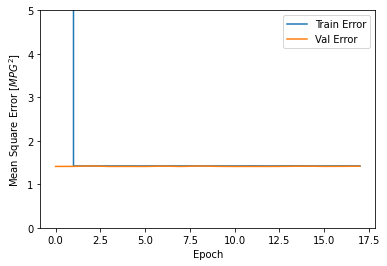

In [180]:
plot_history(history)

In [29]:
def make_statics_table(target, key, diff_key, x_train, x_valid, x_test):
    target_encoding = pd.concat([
        pd.DataFrame(x_train.groupby(key)[target].count()).rename(columns={target:f'te_{key}_{target}_count'}),
        pd.DataFrame(x_train.groupby(key)[target].min()).rename(columns={target:f'te_{key}_{target}_min'}),
        pd.DataFrame(x_train.groupby(key)[target].max()).rename(columns={target:f'te_{key}_{target}_max'}),
        pd.DataFrame(x_train.groupby(key)[target].std()).rename(columns={target:f'te_{key}_{target}_std'}),
        pd.DataFrame(x_train.groupby(key)[target].mean()).rename(columns={target:f'te_{key}_{target}_mean'}),
        pd.DataFrame(x_train.groupby(key)[target].median()).rename(columns={target:f'te_{key}_{target}_median'}),
    ], axis = 1)

    x_train = pd.merge(x_train, target_encoding, on=key, how='left')
    x_valid = pd.merge(x_valid, target_encoding, on=key, how='left')
    x_test = pd.merge(x_test, target_encoding, on=key, how='left')

    x_train[f'te_diff_{diff_key}_{key}_{target}_mean'] = x_train[diff_key] - x_train[f'te_{key}_{target}_mean']
    x_train[f'te_rate_{diff_key}_{key}_{target}_mean'] = x_train[diff_key] / x_train[f'te_{key}_{target}_mean']
    x_valid[f'te_diff_{diff_key}_{key}_{target}_mean'] = x_valid[diff_key] - x_valid[f'te_{key}_{target}_mean']
    x_valid[f'te_rate_{diff_key}_{key}_{target}_mean'] = x_valid[diff_key] / x_valid[f'te_{key}_{target}_mean']
    x_test[f'te_diff_{diff_key}_{key}_{target}_mean'] = x_test[diff_key] - x_test[f'te_{key}_{target}_mean']
    x_test[f'te_rate_{diff_key}_{key}_{target}_mean'] = x_test[diff_key] / x_test[f'te_{key}_{target}_mean']

    return x_train, x_valid, x_test

In [31]:
# --------------------------------------
# パラメータ定義
# --------------------------------------
lgb_params = {
    'objective': 'root_mean_squared_error',
    'boosting_type': 'gbdt',
    'n_estimators': 1000,
    #'colsample_bytree': 0.8,
    #'subsamples': 0.8,
    #'bagging_freq': 1,
    #'n_estimators': 50000,
    #'learning_rate': 0.01,
}

result_y = []
result_proba = []

for fold_no in range(NFOLDS):
    test_fold_no = fold_no
    valid_fold_no = fold_no + 1
    if valid_fold_no == NFOLDS:
        valid_fold_no = 0

    # train
    train = df_train.copy()
    y_train = train[~train['fold_no'].isin([test_fold_no, valid_fold_no])]['cites'].values
    y_valid = train[train['fold_no'] == valid_fold_no]['cites'].values
    y_test = train[train['fold_no'] == test_fold_no]['cites'].values

    train = train.drop(
        ['id', 'authors', 'title', 'comments',
        'journal-ref', 'doi', 'report-no', 'categories', 'license',
        'abstract', 'versions', 'update_date_x', 'authors_parsed', 'pub_publisher',
        'update_date_y', 'first_created_date', 'last_created_date', 'doi_id', 'submitter', 'author_first', 'category_main', 'category_main_detail', 'category_name_parent_main_unique', 'category_name_parent_unique', 'category_name_unique']
        , axis=1
    )

    x_train = train[~train['fold_no'].isin([test_fold_no, valid_fold_no])]
    x_valid = train[train['fold_no'] == valid_fold_no]
    x_test = train[train['fold_no'] == test_fold_no]

    # target encoding
    '''
    target = 'doi_cites'
    key = 'pred_doi_cites'
    x_train, x_valid, x_test = make_statics_table(target, key, 'doi_cites', x_train, x_valid, x_test)

    keys = ['update_ym']
    target = 'cites'
    for key in keys:
        x_train, x_valid, x_test = make_statics_table(target, key, 'doi_cites', x_train, x_valid, x_test)
    '''

    # drop
    x_train = x_train.drop(['cites', 'fold_no'], axis=1)
    x_valid = x_valid.drop(['cites', 'fold_no'], axis=1)
    x_test = x_test.drop(['cites', 'fold_no'], axis=1)

    model = lgb.LGBMRegressor(**lgb_params)
    model.fit(x_train, y_train,
                eval_set=(x_valid, y_valid),
                eval_metric='rmse',
                verbose=100,
                early_stopping_rounds=20,
    )

    fold_result = model.predict(x_test)
    result_y.extend(y_test)
    result_proba.extend(fold_result)
    rmsle = mean_squared_error(y_test, fold_result, squared=False)
    print(f"fold {fold_no} lgb score: {rmsle}")

rmsle = mean_squared_error(result_y, result_proba, squared=False)
print("+-" * 40)
print(f"score: {rmsle}")


/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's rmse: 0.489893
fold 0 lgb score: 0.4895506668010232
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
Training until validation scores don't improve for 20 rounds


In [21]:
feature = x_train.copy()
df_feature = pd.DataFrame(model.booster_.feature_importance(importance_type='gain'), index=feature.columns, columns=['importance']).sort_values('importance', ascending=False)
df_feature.head(50)


,importance
diff_doi_cites_doi_cites_mean_category_main_label,45795.037755
diff_rate_doi_cites_doi_cites_mean_category_main_label,8757.592895
diff_doi_cites_doi_cites_mean_category_name_parent_label,5253.467518
doi_cites,4815.532253
diff_doi_cites_doi_cites_mean_license_label,2806.191580
category_name_label,1147.414260
diff_doi_cites_doi_cites_mean_category_name_parent_main_label,1089.729043
diff_doi_cites_doi_cites_mean_doi_id_label,1070.454420
diff_doi_cites_doi_cites_mean_update_ym,768.030582
diff_rate_doi_cites_doi_cites_mean_license_label,734.067752


In [20]:
df_temp = df_feature.reset_index()
df_temp[df_temp['index'].str.contains('umap')]

,index,importance
88,umap_bert_4,21.30862
197,umap_bert_9,13.55462
379,umap_bert_8,8.13530
402,umap_bert_7,7.68458
505,umap_bert_0,6.15386
532,umap_bert_5,5.58353
789,umap_bert_2,1.94640
821,umap_bert_6,1.36525
922,umap_bert_1,0.00000
927,umap_bert_3,0.00000


In [20]:
SEED = 777
result_y = []
result_proba = []

for fold_no in range(NFOLDS):
    test_fold_no = fold_no
    valid_fold_no = fold_no + 1
    if valid_fold_no == NFOLDS:
        valid_fold_no = 0

    # train
    train = df_train.copy()
    y_train = train[~train['fold_no'].isin([test_fold_no, valid_fold_no])]['cites'].values
    y_valid = train[train['fold_no'] == valid_fold_no]['cites'].values
    y_test = train[train['fold_no'] == test_fold_no]['cites'].values

    train = train.drop(
        ['id', 'authors', 'title', 'comments',
        'journal-ref', 'doi', 'report-no', 'categories', 'license',
        'abstract', 'versions', 'update_date_x', 'authors_parsed', 'pub_publisher',
        'update_date_y', 'first_created_date', 'last_created_date', 'doi_id', 'submitter', 'author_first', 'category_main', 'category_main_detail', 'category_name_parent_main_unique', 'category_name_parent_unique', 'category_name_unique']
        , axis=1
    )

    x_train = train[~train['fold_no'].isin([test_fold_no, valid_fold_no])]
    x_valid = train[train['fold_no'] == valid_fold_no]
    x_test = train[train['fold_no'] == test_fold_no]

    # target encoding
    #target = 'doi_cites'
    #key = 'pred_doi_cites'
    #x_train, x_valid, x_test = make_statics_table(target, key, x_train, x_valid, x_test)

    #keys = ['update_ym', 'license_label', 'pub_publisher_label', 'category_main_label', 'category_name_parent_label', 'category_name_parent_main_label', 'category_name_label', 'pred_doi_cites']
    '''
    keys = ['update_ym', 'license_label', 'pub_publisher_label', 'category_main_label', 'category_name_parent_label', 'category_name_parent_main_label']
    target = 'cites'
    for key in keys:
        x_train, x_valid, x_test = make_statics_table(target, key, x_train, x_valid, x_test)
    '''
    
    # drop
    x_train = x_train.drop(['cites', 'fold_no'], axis=1)
    x_valid = x_valid.drop(['cites', 'fold_no'], axis=1)
    x_test = x_test.drop(['cites', 'fold_no'], axis=1)


    cat_features = np.where(x_train.dtypes == 'category')[0]
    train_pool = Pool(x_train, y_train, cat_features=cat_features)
    validate_pool = Pool(x_valid, y_valid, cat_features=cat_features)
    test_pool = Pool(x_test, y_test, cat_features=cat_features)
    
    model = CatBoostRegressor(loss_function='RMSE')
    #model = lgb.LGBMRegressor(**lgb_params)
    model.fit(train_pool,
                eval_set=validate_pool,
                verbose=100,
                early_stopping_rounds=20,
    )

    fold_result = model.predict(x_test)
    result_y.extend(y_test)
    result_proba.extend(fold_result)
    rmsle = mean_squared_error(y_test, fold_result, squared=False)
    print(f"fold {fold_no} lgb score: {rmsle}")

rmsle = mean_squared_error(result_y, result_proba, squared=False)
print("+-" * 40)
print(f"score: {rmsle}")


Learning rate set to 0.073805
0:	learn: 1.1316676	test: 1.1299907	best: 1.1299907 (0)	total: 128ms	remaining: 2m 7s
100:	learn: 0.4886079	test: 0.4943834	best: 0.4943337 (98)	total: 5.57s	remaining: 49.5s
200:	learn: 0.4542434	test: 0.4885115	best: 0.4883405 (196)	total: 10.3s	remaining: 41.1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.488340488
bestIteration = 196

Shrink model to first 197 iterations.
fold 0 lgb score: 0.49071750290882615
Learning rate set to 0.073805
0:	learn: 1.1337907	test: 1.1099454	best: 1.1099454 (0)	total: 55ms	remaining: 54.9s
100:	learn: 0.4834780	test: 0.5257901	best: 0.5257901 (100)	total: 5.71s	remaining: 50.8s
200:	learn: 0.4486114	test: 0.5214671	best: 0.5214671 (200)	total: 10.9s	remaining: 43.4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.5209384258
bestIteration = 222

Shrink model to first 223 iterations.
fold 1 lgb score: 0.49058213040412013
Learning rate set to 0.073805
0:	learn: 1.1324993	test: 1.1

In [28]:
x_train.columns[categorical_features_indices]

Index(['submitter_label', 'doi_id_label', 'author_first_label',
       'pub_publisher_label', 'license_label', 'category_main_label',
       'category_name_parent_label', 'category_name_parent_main_label',
       'category_name_label'],
      dtype='object')

In [ ]:
 # 0.5029752173028096 lgb normal

In [33]:
x_train.head()

,doi_cites,pub_journals,pub_dois,update_year,first_created_year,last_created_year,update_month,first_created_month,last_created_month,update_ym,first_created_ym,last_created_ym,update_day,first_created_day,last_created_day,update_date_unixtime,first_created_unixtime,last_created_unixtime,diff_update_date_unixtime,diff_created_unixtime,num_created,update_date_days,first_created_days,last_created_days,diff_created_days,rate_created_days,author_num,astro-ph.co,astro-ph.ep,astro-ph.ga,astro-ph.he,astro-ph.im,astro-ph.sr,cond-mat.dis-nn,cond-mat.mes-hall,cond-mat.mtrl-sci,cond-mat.other,cond-mat.quant-gas,cond-mat.soft,cond-mat.stat-mech,cond-mat.str-el,cond-mat.supr-con,cs.ai,cs.ar,cs.cc,cs.ce,cs.cg,cs.cl,cs.cr,cs.cv,cs.cy,cs.db,cs.dc,cs.dl,cs.dm,cs.ds,cs.et,cs.fl,cs.gl,cs.gr,cs.gt,cs.hc,cs.ir,cs.it,cs.lg,cs.lo,cs.ma,cs.mm,cs.ms,cs.na,cs.ne,cs.ni,cs.oh,cs.os,cs.pf,cs.pl,cs.ro,cs.sc,cs.sd,cs.se,cs.si,cs.sy,econ.em,econ.gn,econ.th,eess.as,eess.iv,eess.sp,eess.sy,math.ac,math.ag,math.ap,math.at,math.ca,math.co,math.ct,math.cv,math.dg,math.ds,math.fa,math.gm,math.gn,math.gr,math.gt,math.ho,math.it,math.kt,math.lo,math.mg,math.mp,math.na,math.nt,math.oa,math.oc,math.pr,math.qa,math.ra,math.rt,math.sg,math.sp,math.st,nlin.ao,nlin.cd,nlin.cg,nlin.ps,nlin.si,physics.acc-ph,physics.ao-ph,physics.app-ph,physics.atm-clus,physics.atom-ph,physics.bio-ph,physics.chem-ph,physics.class-ph,physics.comp-ph,physics.data-an,physics.ed-ph,physics.flu-dyn,physics.gen-ph,physics.geo-ph,physics.hist-ph,physics.ins-det,physics.med-ph,physics.optics,physics.plasm-ph,physics.pop-ph,physics.soc-ph,physics.space-ph,q-bio.bm,q-bio.cb,q-bio.gn,q-bio.mn,q-bio.nc,q-bio.ot,q-bio.pe,q-bio.qm,q-bio.sc,q-bio.to,q-fin.cp,q-fin.ec,q-fin.gn,q-fin.mf,q-fin.pm,q-fin.pr,q-fin.rm,q-fin.st,q-fin.tr,stat.ap,stat.co,stat.me,stat.ml,stat.ot,stat.th,acc-phys,adap-org,alg-geom,ao-sci,astro-ph,atom-ph,bayes-an,chao-dyn,chem-ph,cmp-lg,comp-gas,cond-mat,dg-ga,funct-an,gr-qc,hep-ex,hep-lat,hep-ph,hep-th,math-ph,mtrl-th,nucl-ex,nucl-th,patt-sol,plasm-ph,q-alg,q-bio,q-fin,quant-ph,solv-int,supr-con,acc,adap,alg,ao,astro,atom,bayes,chao,chem,cmp,comp,cond,cs,dg,econ,eess,funct,gr,hep,math,mtrl,nlin,nucl,patt,physics,plasm,q,quant,solv,stat,supr,submitter_label,doi_id_label,author_first_label,pub_publisher_label,license_label,category_main_label,doi_cites_mean_author_first_label,doi_cites_count_author_first_label,doi_cites_sum_author_first_label,doi_cites_min_author_first_label,doi_cites_max_author_first_label,doi_cites_median_author_first_label,doi_cites_std_author_first_label,doi_cites_q10_author_first_label,doi_cites_q25_author_first_label,doi_cites_q75_author_first_label,doi_cites_mean_doi_id_label,doi_cites_count_doi_id_label,doi_cites_sum_doi_id_label,doi_cites_min_doi_id_label,doi_cites_max_doi_id_label,doi_cites_median_doi_id_label,doi_cites_std_doi_id_label,doi_cites_q10_doi_id_label,doi_cites_q25_doi_id_label,doi_cites_q75_doi_id_label,doi_cites_mean_pub_publisher_label,doi_cites_count_pub_publisher_label,doi_cites_sum_pub_publisher_label,doi_cites_min_pub_publisher_label,doi_cites_max_pub_publisher_label,doi_cites_median_pub_publisher_label,doi_cites_std_pub_publisher_label,doi_cites_q10_pub_publisher_label,doi_cites_q25_pub_publisher_label,doi_cites_q75_pub_publisher_label,doi_cites_mean_submitter_label,doi_cites_count_submitter_label,doi_cites_sum_submitter_label,doi_cites_min_submitter_label,doi_cites_max_submitter_label,doi_cites_median_submitter_label,doi_cites_std_submitter_label,doi_cites_q10_submitter_label,doi_cites_q25_submitter_label,doi_cites_q75_submitter_label,doi_cites_mean_category_main_label,doi_cites_count_category_main_label,doi_cites_sum_category_main_label,doi_cites_min_category_main_label,doi_cites_max_category_main_label,doi_cites_median_category_main_label,doi_cites_std_category_main_label,doi_cites_q10_category_main_label,doi_cites_q25_category_main_label,doi_cites_q75_category_main_label,doi_cites_mean_update_ym,doi_cites_count_update_ym,doi_cites_sum

In [45]:
feature = x_train.copy()
df_feature = pd.DataFrame(model.booster_.feature_importance(importance_type='gain'), index=feature.columns, columns=['importance']).sort_values('importance', ascending=False)
df_feature.head(50)


,importance
diff_doi_cites_doi_cites_mean_category_main_label,45452.756427
te_diff_license_label_cites_mean,9845.287023
diff_rate_doi_cites_doi_cites_mean_category_main_label,9263.424620
te_rate_license_label_cites_mean,3971.043035
diff_doi_cites_doi_cites_mean_doi_id_label,1151.217911
doi_cites,696.934825
diff_doi_cites_doi_cites_mean_update_ym,596.695166
last_created_ym,393.102887
diff_rate_doi_cites_doi_cites_mean_pub_publisher_label,359.453805
category_main_label,283.692540


In [14]:
df_feature.tail(400)


,importance
rbert_vec_raw_768_665,0.0
rbert_vec_raw_768_697,0.0
cs.ds,0.0
rbert_vec_raw_768_695,0.0
rbert_vec_raw_768_693,0.0
...,...
rbert_vec_raw_768_341,0.0
bayes-an,0.0
atom-ph,0.0
rbert_vec_raw_768_344,0.0
